In [25]:
library(MsBackendMsp)
library(Spectra)

In [26]:
##-----------------------------------------------------------------
## filter intensity 
##-----------------------------------------------------------------

#' Define a filtering function and remove peaks less than 0.05 of intensity
low_int <- function(c, ...) {
    c > max(c, na.rm = TRUE) * 0.05
}

# Usage:
# filterIntensity(spectra_object, intensity = low_int)


##-----------------------------------------------------------------
## normalize intensity 
##-----------------------------------------------------------------

#' Define a function to *normalize* the intensities
norm_int <- function(y, ...) {
    maxint <- max(y[, "intensity"], na.rm = TRUE)
    y[, "intensity"] <- 100 * y[, "intensity"] / maxint
    y
}


In [27]:
sps_all <- Spectra("/Users/mahnoorzulfiqar/OneDriveUNI/MAW-data/StandardSMarinoi_Data/Run1_Standards/VN_211016_butanoyl_carnitine.mzML", backend = MsBackendMzR())

In [28]:
sps_all

MSn data (Spectra) with 3289 spectra in a MsBackendMzR backend:
       msLevel     rtime scanIndex
     <integer> <numeric> <integer>
1            1   30.3494         1
2            1   30.8078         2
3            1   30.9309         3
4            1   31.0418         4
5            1   31.1529         5
...        ...       ...       ...
3285         1   539.549      3285
3286         1   539.678      3286
3287         1   539.809      3287
3288         1   539.939      3288
3289         1   540.069      3289
 ... 33 more variables/columns.

file(s):
VN_211016_butanoyl_carnitine.mzML

In [29]:
sps_all <- filterEmptySpectra(sps_all)

In [30]:
sps_all

MSn data (Spectra) with 3289 spectra in a MsBackendMzR backend:
       msLevel     rtime scanIndex
     <integer> <numeric> <integer>
1            1   30.3494         1
2            1   30.8078         2
3            1   30.9309         3
4            1   31.0418         4
5            1   31.1529         5
...        ...       ...       ...
3285         1   539.549      3285
3286         1   539.678      3286
3287         1   539.809      3287
3288         1   539.939      3288
3289         1   540.069      3289
 ... 33 more variables/columns.

file(s):
VN_211016_butanoyl_carnitine.mzML
Processing:
 Filter: removed empty spectra. [Thu Sep 22 16:35:37 2022] 

In [31]:
pre_mz <- unique(precursorMz(sps_all))
pre_mz

[1]       NA 232.1543

In [32]:
x <- 232.154251098633

In [33]:
sps <- filterPrecursorMzValues(sps_all, mz = x + ppm(c(-x, x), 10))

In [34]:
sps

MSn data (Spectra) with 117 spectra in a MsBackendMzR backend:
      msLevel     rtime scanIndex
    <integer> <numeric> <integer>
1           2   77.7665       290
2           2   78.2781       292
3           2   78.7960       294
4           2   79.3142       296
5           2   79.8373       298
...       ...       ...       ...
113         2   123.736       514
114         2   124.125       516
115         2   124.513       518
116         2   124.902       520
117         2   125.422       522
 ... 33 more variables/columns.

file(s):
VN_211016_butanoyl_carnitine.mzML
Processing:
 Filter: removed empty spectra. [Thu Sep 22 16:35:37 2022]
 Filter: select spectra with precursor m/z matching 232.156572641144, 232.156572641144 [Thu Sep 22 16:35:37 2022] 

In [35]:
load("/Users/mahnoorzulfiqar/OneDriveUNI/MAW-data/newDBs/mbankNIST.rda")

In [36]:
#' Apply the function to filter the spectra
sps <- filterIntensity(sps, intensity = low_int)
#' *Apply* the function to the data
sps <- addProcessing(sps, norm_int)

In [38]:
has_mz <- containsMz(mbank, mz = x, ppm = 15)
mbank_with_mz <- mbank[has_mz]
mbank_with_mz

MSn data (Spectra) with 54 spectra in a MsBackendMsp backend:
      msLevel     rtime scanIndex
    <integer> <numeric> <integer>
1           2        NA        NA
2           2        NA        NA
3           2        NA        NA
4           2        NA        NA
5           2        NA        NA
...       ...       ...       ...
50          2        NA        NA
51          2        NA        NA
52          2        NA        NA
53          2        NA        NA
54          2        NA        NA
 ... 35 more variables/columns.

In [39]:
#' Apply the function to filter the spectra
mbank_with_mz <- filterIntensity(mbank_with_mz, intensity = low_int)
#' *Apply* the function to the data
mbank_with_mz <- addProcessing(mbank_with_mz, norm_int)

In [43]:
res <- compareSpectra(sps, mbank_with_mz, ppm = 15)
res

0,0,0.0000000000,0.0001298794,0,0,0.0000000000,0,0.000000000,0.000000000,⋯,0.0004363568,0.0011979545,0,0,0.034966180,0.002567174,0,0,0.0000000000,0.000000e+00
0,0,0.0000000000,0.0000000000,0,0,0.0000000000,0,0.000000000,0.000000000,⋯,0.0001994426,0.0000000000,0,0,0.005623472,0.000000000,0,0,0.0000000000,8.776283e-05
0,0,0.0000000000,0.0000000000,0,0,0.0000000000,0,0.000000000,0.000000000,⋯,0.0000000000,0.0035072811,0,0,0.021630556,0.004048102,0,0,0.0000000000,2.981621e-04
0,0,0.0000000000,0.0005952129,0,0,0.0005854687,0,0.000000000,0.000000000,⋯,0.0000000000,0.0011821149,0,0,0.013536016,0.002533230,0,0,0.0000000000,0.000000e+00
0,0,0.0000000000,0.0000000000,0,0,0.0000000000,0,0.000000000,0.000000000,⋯,0.0000000000,0.0007984066,0,0,0.009142296,0.001710957,0,0,0.0000000000,0.000000e+00
0,0,0.0003986122,0.0010585410,0,0,0.0011332711,0,0.000000000,0.000000000,⋯,0.0000000000,0.0008826222,0,0,0.025176876,0.001891428,0,0,0.0005751191,0.000000e+00
0,0,0.0000000000,0.0000000000,0,0,0.0000000000,0,0.000000000,0.000000000,⋯,0.0001220159,0.0000000000,0,0,0.002485851,0.000000000,0,0,0.0000000000,1.319034e-04
0,0,0.0000000000,0.0000000000,0,0,0.0000000000,0,0.000000000,0.000000000,⋯,0.0000000000,0.0000000000,0,0,0.003744827,0.000000000,0,0,0.0000000000,0.000000e+00
0,0,0.0000000000,0.0000000000,0,0,0.0000000000,0,0.000000000,0.000000000,⋯,0.0000000000,0.0000000000,0,0,0.003317428,0.000000000,0,0,0.0000000000,0.000000e+00
0,0,0.0015380641,0.0007547026,0,0,0.0000000000,0,0.001301828,0.001301828,⋯,0.0000000000,0.0000000000,0,0,0.003050412,0.000000000,0,0,0.0000000000,0.000000e+00
0,0,0.0000000000,0.0000000000,0,0,0.0000000000,0,0.000000000,0.000000000,⋯,0.0000000000,0.0011442783,0,0,0.013102761,0.002452147,0,0,0.0000000000,0.000000e+00


In [44]:
best_match <- which(res == max(res), arr.ind = TRUE)

In [53]:
best_match

row,col
76,49


In [52]:
max(res)

[1] 0.4362987

In [47]:
spectraVariables(mbank[76])

[1] "msLevel"                 "rtime"                  
 [3] "acquisitionNum"          "scanIndex"              
 [5] "dataStorage"             "dataOrigin"             
 [7] "centroided"              "smoothed"               
 [9] "polarity"                "precScanNum"            
[11] "precursorMz"             "precursorIntensity"     
[13] "precursorCharge"         "collisionEnergy"        
[15] "isolationWindowLowerMz"  "isolationWindowTargetMz"
[17] "isolationWindowUpperMz"  "Name"                   
[19] "Synon"                   "accession"              
[21] "InChIKey"                "InChI"                  
[23] "smiles"                  "Precursor_type"         
[25] "Spectrum_type"           "PrecursorMZ"            
[27] "Instrument_type"         "Instrument"             
[29] "Ion_mode"                "Collision_energy"       
[31] "Formula"                 "MW"                     
[33] "ExactMass"               "Comments"               
[35] "Splash"                  "Num.Peaks"

In [54]:
mbank_with_mz[49]$'Name'

[1] "Butyryl carnitine (isomer of 920)"

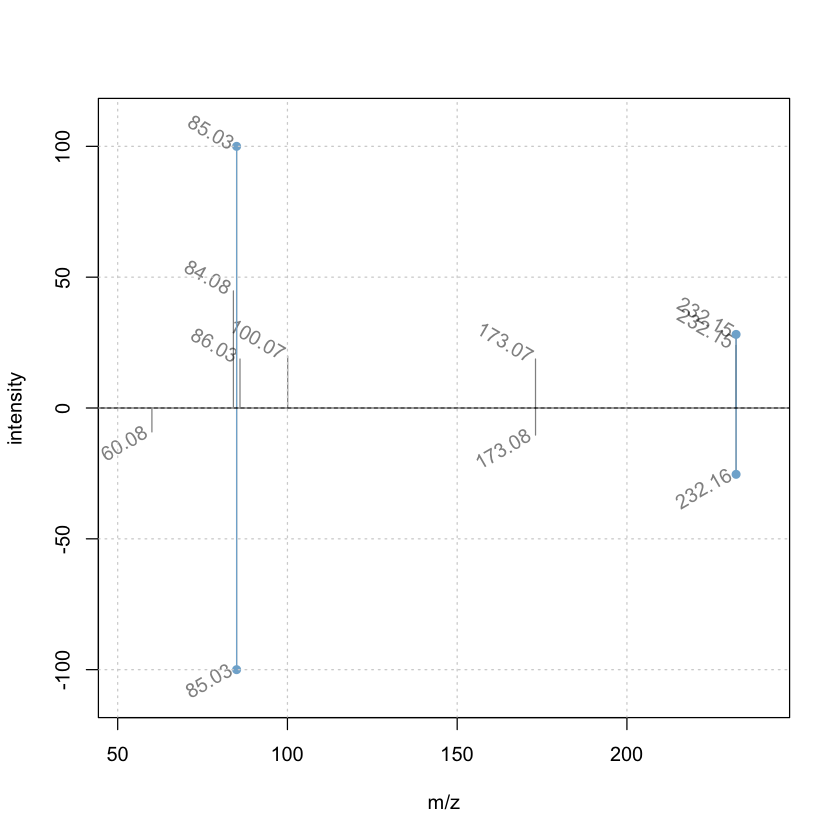

In [55]:
#' Specifying a function to draw peak labels
label_fun <- function(x) {
    ints <- unlist(intensity(x))
    mzs <- format(unlist(mz(x)), digits = 4)
    mzs[ints < 5] <- ""
    mzs
}
plotSpectraMirror(mbank_with_mz[best_match[2]], sps[best_match[1]],
                  ppm = 20, labels = label_fun, labelPos = 2,
                  labelOffset = 0.2, labelSrt = -30)
grid()